In [113]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, Reshape
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
%precision 3

'%.3f'

(1797, 64)
(100, 64)
(100,)
(1000, 64)


<Figure size 432x288 with 0 Axes>

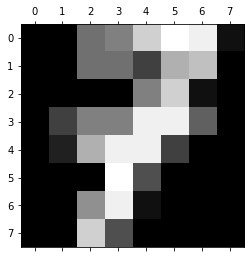

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

#data{ndarray, dataframe} of shape (1797, 64)
#The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.
X = digits.data
#target: {ndarray, Series} of shape (1797,)
#The classification target. If as_frame=True, target will be a pandas Series.
Y = digits.target


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=1000,train_size=100)

fig = plt.figure()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
plt.gray()
plt.matshow(digits.images[7])
plt.show()

fig.savefig("img.png")

In [115]:
print('train:',pd.DataFrame(y_train,columns=['label']).groupby('label')['label'].count())

print('test:',pd.DataFrame(y_test,columns=['label']).groupby('label')['label'].count())


train: label
0    11
1    10
2     7
3    16
4     8
5     7
6     8
7    12
8    13
9     8
Name: label, dtype: int64
test: label
0    100
1    100
2     97
3    101
4     94
5    118
6    100
7     87
8     99
9    104
Name: label, dtype: int64


In [116]:
#X_train = X_train.reshape(100, 64)
#X_test = X_test.reshape(1000, 64)
X_train = X_train.reshape(1347, 64)
X_test = X_test.reshape(450, 64)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 16
X_test /= 16
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

100 train samples
1000 test samples


In [117]:

#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(64,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                330       
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          batch_size=20,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/300
10/10 [==============================] - 4s 364ms/step - loss: 0.9455 - accuracy: 0.7400 - val_loss: 1.0998 - val_accuracy: 0.6860
Epoch 2/300
10/10 [==============================] - 5s 451ms/step - loss: 0.9439 - accuracy: 0.7400 - val_loss: 1.0905 - val_accuracy: 0.6850
Epoch 3/300
10/10 [==============================] - 3s 325ms/step - loss: 0.9231 - accuracy: 0.7800 - val_loss: 1.0819 - val_accuracy: 0.6940
Epoch 4/300
10/10 [==============================] - 3s 302ms/step - loss: 0.9214 - accuracy: 0.7900 - val_loss: 1.0718 - val_accuracy: 0.6990
Epoch 5/300
10/10 [==============================] - 1s 88ms/step - loss: 0.9706 - accuracy: 0.7200 - val_loss: 1.0626 - val_accuracy: 0.7020
Epoch 6/300
10/10 [==============================] - 1s 103ms/step - loss: 0.9724 - accuracy: 0.7100 - val_loss: 1.0534 - val_accuracy: 0.7010
Epoch 7/300
10/10 [==============================] - 2s 197ms/step - loss: 0.9315 - accuracy: 0.7200 - val_loss: 1.0427 - val_accuracy: 0.7040


10/10 [==============================] - 1s 107ms/step - loss: 0.3320 - accuracy: 0.9300 - val_loss: 0.5275 - val_accuracy: 0.8470
Epoch 116/300
10/10 [==============================] - 1s 97ms/step - loss: 0.3045 - accuracy: 0.9300 - val_loss: 0.5271 - val_accuracy: 0.8510
Epoch 117/300
10/10 [==============================] - 1s 115ms/step - loss: 0.2913 - accuracy: 0.9300 - val_loss: 0.5264 - val_accuracy: 0.8500
Epoch 118/300
10/10 [==============================] - 1s 101ms/step - loss: 0.2972 - accuracy: 0.9500 - val_loss: 0.5281 - val_accuracy: 0.8440
Epoch 119/300
10/10 [==============================] - 1s 99ms/step - loss: 0.2875 - accuracy: 0.9600 - val_loss: 0.5307 - val_accuracy: 0.8440
Epoch 120/300
10/10 [==============================] - 1s 95ms/step - loss: 0.2628 - accuracy: 0.9500 - val_loss: 0.5343 - val_accuracy: 0.8420
Epoch 121/300
10/10 [==============================] - 1s 120ms/step - loss: 0.2885 - accuracy: 0.9200 - val_loss: 0.5217 - val_accuracy: 0.8470
Ep

Epoch 172/300
10/10 [==============================] - 1s 146ms/step - loss: 0.2002 - accuracy: 0.9700 - val_loss: 0.4675 - val_accuracy: 0.8680
Epoch 173/300
10/10 [==============================] - 2s 171ms/step - loss: 0.1608 - accuracy: 0.9900 - val_loss: 0.4656 - val_accuracy: 0.8690
Epoch 174/300
10/10 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9600

In [120]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1059987545013428
Test accuracy: 0.6930000185966492
